In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
seaborn.set_style('white')
import hoag 
import mod_l_exp.utils as mlx
import numpy as np

Might want to install library "tabulate" for a better dictionary printing


### GENERATE DATASET

In [2]:
dataset = mlx.generate_multiclass_dataset(n_samples=90000, n_features=1000, n_informative=50, n_redundant=25, n_repeated=0,
                                      n_classes=2, n_clusters_per_class=3,
                                      flip_y=0.1, class_sep=1.0,
                                      random_state=1, hot_encoded=False, partitions_proportions=[1/3, 1/3])

datasets.redivide_data:, computed partitions numbers - [0, 30000, 60000, 90000] len all 90000 DONE


### RESPONSE  FUNCTION for $\alpha$

Setting: we use logistic regression (for binary classification) and optimize regularization hyper-parameter

In [3]:
from sklearn import linear_model

alphas = np.linspace(-0, 20, 50)

def cost_func(a):
    clf = linear_model.LogisticRegression(
        solver='lbfgs',
        C=np.exp(-a), fit_intercept=True, 
        tol=1e-15, max_iter=500)

    clf.fit(dataset.train.data, dataset.train.target)
    cost = linear_model.logistic._logistic_loss(clf.coef_.ravel(), 
                                                dataset.validation.data, dataset.validation.target, 0.)
    print('.', end='')
    return cost

..................................................

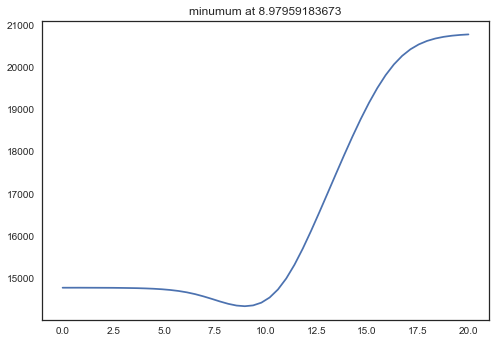

In [4]:
scores = [cost_func(a) for a in alphas]
plt.plot(alphas, scores)
plt.title('minumum at ' + str(alphas[np.argmin(scores)]));

Here the optimal $\alpha$ is outside of default interval...

### HOAG - NO BOUNDS ON $\alpha$

In [5]:
identity = lambda x: x
clf, res = mlx.hoag_fit(dataset, alpha0=20., projection=identity, max_iter=50)
# 1/0

started hoag

Log step 0
training error [ 1215426.07830054]
validation error 1214580.71371
test error 1222810.27415
validation accuracy 0.5034
test accuracy 0.5021
alpha [ 20.]
der alpha [ 0.]
step size 0.0
inner level iterations: 1, inner objective 20852.2951225, grad norm 263094.59684742737
Inverting matrix with precision 0.001
increased step size
it 1, g: 20771.6672043, incr: -inf, sum lambda 19.0, epsilon: 0.0009000000000000001, L: 20.7384742337, norm grad_lambda: 21.8299728775

Log step 1
training error [ 20771.66695779]
validation error 20771.6672043
test error 20769.3240897
validation accuracy 0.544366666667
test accuracy 0.549233333333
alpha [ 20.]
der alpha 21.8299728775
step size 0.0458085772992
inner level iterations: 0, inner objective 20801.3283999, grad norm 122623.6517591924
Inverting matrix with precision 0.0009000000000000001
it 2, g: 20771.6672043, incr: 0.0, sum lambda 17.9573988528, epsilon: 0.0008100000000000001, L: 20.7384742337, norm grad_lambda: 21.6219570281

L

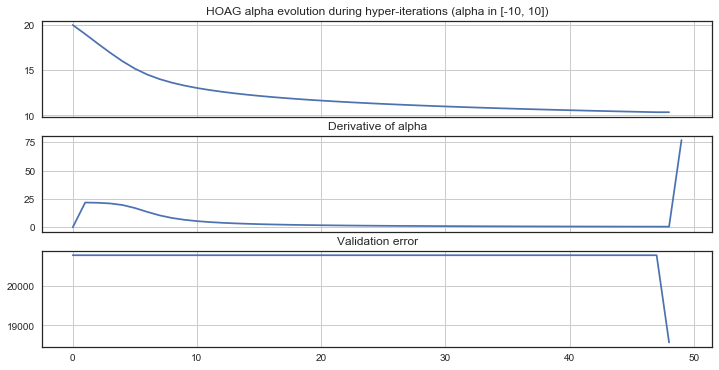

In [6]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['font.size'] = 20

fig, ax = plt.subplots(nrows=3, sharex=True)
ax[0].plot(res['alpha'][1:])
ax[0].grid()
#ax[0].set_ylim(-1, 21)
ax[0].set_title('HOAG alpha evolution during hyper-iterations (alpha in [-10, 10])')
ax[1].plot(res['der alpha'])
ax[1].set_title('Derivative of alpha')
ax[1].grid()

#ax[2].set_ylim(14500, 15000)
ax[2].plot(res['validation error'][1:])
ax[2].set_title('Validation error');  # the one we're optimizing
ax[2].grid()


Without bounds the algorithm diverges... But here the step size looks kind of too big... Shouldn't it decrease?

In [7]:
identity = lambda x: x
clf, res = mlx.hoag_fit(dataset, alpha0=0., projection=identity, max_iter=50)
# 1/0

started hoag

Log step 0
training error [ 1114596.0570554]
validation error 1132312.25605
test error 1130279.24706
validation accuracy 0.501166666667
test accuracy 0.498266666667
alpha [ 0.]
der alpha [ 0.]
step size 0.0
inner level iterations: 130, inner objective 13631.4720564, grad norm 198.96785596281396
Inverting matrix with precision 0.001
increased step size
it 1, g: 14729.8079331, incr: -inf, sum lambda 1.0, epsilon: 0.0009000000000000001, L: 23.149569282, norm grad_lambda: 24.3679676653

Log step 1
training error [ 13619.23606079]
validation error 14729.8079331
test error 14748.6862754
validation accuracy 0.772366666667
test accuracy 0.7753
alpha [ 0.]
der alpha -24.3679676653
step size 0.0410374805867
inner level iterations: 22, inner objective 13651.0972254, grad norm 76.33267290762349
Inverting matrix with precision 0.0009000000000000001
increased step size
it 2, g: 14716.3200296, incr: -13.4879034711, sum lambda 1.03260755714, epsilon: 0.0008100000000000001, L: 21.99209081

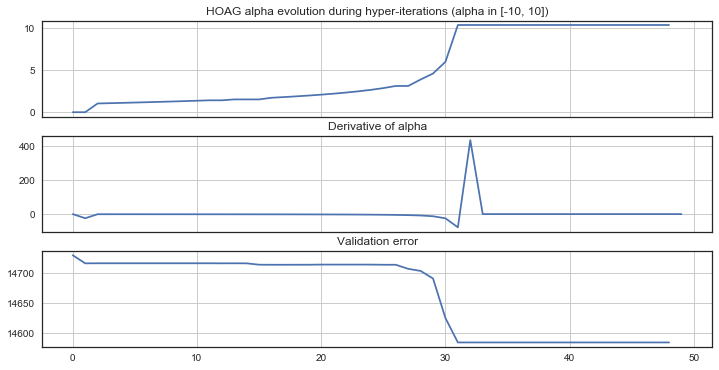

In [8]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['font.size'] = 20

fig, ax = plt.subplots(nrows=3, sharex=True)
ax[0].plot(res['alpha'][1:])
ax[0].grid()
#ax[0].set_ylim(-1, 21)
ax[0].set_title('HOAG alpha evolution during hyper-iterations (alpha in [-10, 10])')
ax[1].plot(res['der alpha'])
ax[1].set_title('Derivative of alpha')
ax[1].grid()

#ax[2].set_ylim(14500, 15000)
ax[2].plot(res['validation error'][1:])
ax[2].set_title('Validation error');  # the one we're optimizing
ax[2].grid()


### HOAG WITH $\alpha \in [-10, 10]$

In [9]:
proj = lambda x: np.minimum(np.maximum(x, -10.), 10.)
clf2, res2 = mlx.hoag_fit(dataset, alpha0=0., projection=proj, max_iter=40)

started hoag

Log step 0
training error [ 1126993.63443482]
validation error 1120391.77607
test error 1141063.11655
validation accuracy 0.513
test accuracy 0.5072
alpha [ 0.]
der alpha [ 0.]
step size 0.0
inner level iterations: 143, inner objective 13630.6441402, grad norm 240.64347590029485
Inverting matrix with precision 0.001
increased step size
it 1, g: 14706.6920884, incr: -inf, sum lambda 1.0, epsilon: 0.0009000000000000001, L: 23.6495995694, norm grad_lambda: 24.8943153362

Log step 1
training error [ 13618.14314556]
validation error 14706.6920884
test error 14726.4041936
validation accuracy 0.772966666667
test accuracy 0.7761
alpha [ 0.]
der alpha -24.8943153362
step size 0.0401698133287
inner level iterations: 5, inner objective 13652.0192146, grad norm 85.62487134461553
Inverting matrix with precision 0.0009000000000000001
it 2, g: 14707.1740039, incr: 0.481915520237, sum lambda 1.03115149722, epsilon: 0.0008100000000000001, L: 23.6495995694, norm grad_lambda: 0.736720435328

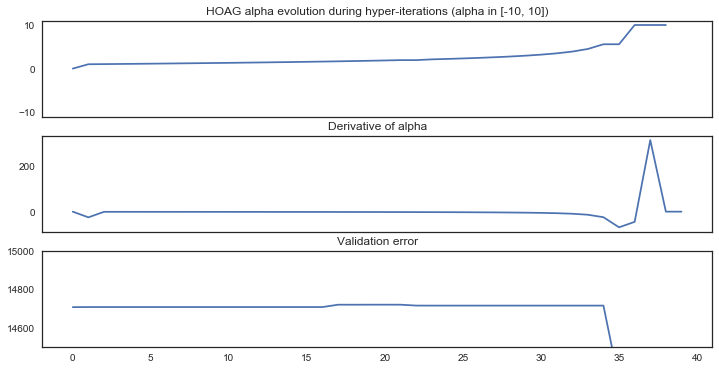

In [10]:
fig, ax = plt.subplots(nrows=3, sharex=True)
ax[0].plot(res2['alpha'][1:])
ax[0].set_ylim(-11, 11)
ax[0].set_title('HOAG alpha evolution during hyper-iterations (alpha in [-10, 10])')
ax[1].plot(res2['der alpha'])
ax[1].set_title('Derivative of alpha')

ax[2].set_ylim(14500, 15000)
ax[2].plot(res2['validation error'][1:])
ax[2].set_title('Validation error');  # the one we're optimizing

Strange thing here is that the derivative w.r.t. $\alpha$ remains quite negative even when it is 10... Could this be changed/avoided with a different $\epsilon$ devrease strategy?